In [43]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import seaborn as sns

In [2]:
# Import API key
from config import weather_api_key

In [3]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [4]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

In [5]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate Cities List

In [6]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
############### CHANGE SIZE TO 1500 WHEN DONE#######################
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#pprint(cities)

600

# Perform API Calls

In [7]:
lat = []
lon = []
temp = []
wind_speed = []
max_temp = []
humidity = []
clouds = []
country = []
city_dt = []
name = []
id =[]
actual_city=[]

In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
city = cities
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [9]:
#Perform a weather check on each city using a series of successive API calls.
#Include a print log of each city as it's being processed (with the city number and city name).
# IT IS GETTING INTERUPTED AT CITY 6: 
# {'cod': '404' , 'message' : 'city not found'}
####PRINT OUT LOG OF CURRENT CITY AND ID AS YOU GO##############
for each_city in city:
    response = requests.get(query_url + each_city).json()
    #pprint(response)
    try:
        city_dt.append(response["dt"])
        id.append(response["id"])
        name.append(response["name"])
        temp.append(response['main']['temp'])
        lat.append(response["coord"]["lat"])
        lon.append(response['coord']['lon'])
        wind_speed.append(response["wind"]["speed"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        clouds.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        actual_city.append(each_city)
        print(f"The city {response['name']} was found with the ID of {response['id']}, appending stats.")
    except KeyError: 
        print("Sorry, that city was not found.")
        pass

The city Cape Town was found with the ID of 3369157, appending stats.
The city Lavrentiya was found with the ID of 4031637, appending stats.
The city Zonguldak was found with the ID of 737021, appending stats.
The city Jamestown was found with the ID of 5122534, appending stats.
The city South Venice was found with the ID of 4173593, appending stats.
The city Vaini was found with the ID of 4032243, appending stats.
The city Luwuk was found with the ID of 1637001, appending stats.
The city Ushuaia was found with the ID of 3833367, appending stats.
The city Bluff was found with the ID of 2206939, appending stats.
The city Williamsport was found with the ID of 5219585, appending stats.
Sorry, that city was not found.
The city Arraial do Cabo was found with the ID of 3471451, appending stats.
The city Haines Junction was found with the ID of 5969025, appending stats.
The city Puerto Ayora was found with the ID of 3652764, appending stats.
The city Olafsvik was found with the ID of 3414079,

# Convert Raw Data to DF

In [ ]:
#Create a DF and display the DataFrame

In [38]:
all_df = pd.DataFrame({"City": actual_city, 
                       "Lat" : lat,
                       "Lng" : lon,
                       "Max Temp" : max_temp,
                       "Humidity": humidity, 
                       "Cloudiness" : clouds, 
                       "Wind Speed" : wind_speed, 
                       "Country" : country, 
                       "Date" : city_dt  
                      })
all_df["Date"] = pd.to_datetime(all_df["Date"], unit ='s')
all_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cape town,-33.9258,18.4232,75.00,56,0,12.66,ZA,2021-04-23 12:16:20
1,lavrentiya,65.5833,-171.0000,24.53,70,100,3.58,RU,2021-04-23 12:12:15
2,zonguldak,41.2500,31.8333,69.80,32,75,11.50,TR,2021-04-23 12:16:20
3,jamestown,42.0970,-79.2353,36.00,80,1,10.36,US,2021-04-23 12:13:35
4,south venice,27.0531,-82.4243,64.99,94,1,10.36,US,2021-04-23 12:16:21


In [39]:
#Do a summary table
all_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000
mean,19.175308,16.958296,61.648199,68.724265,54.284926,8.200313
std,33.435702,91.019436,21.469838,23.015274,37.556853,5.867128
min,-54.800000,-175.200000,-9.130000,3.000000,0.000000,0.490000
25%,-10.194200,-65.179650,48.000000,56.000000,20.000000,3.462500
50%,24.396700,21.900000,64.400000,74.000000,63.500000,6.910000
75%,46.186175,98.834400,78.800000,86.250000,90.000000,11.315000
max,78.218600,179.316700,105.890000,100.000000,100.000000,36.350000


In [40]:
#Export the city data into a .csv.
all_df.to_csv("../output_data/cities.csv", encoding="utf-8", index=False, header=True)

# Inspect Data and Remove Cities Where Humidity is > 100%

In [41]:
# Skip this step if no cities are > 100% humidity 
# Get the indices of cities that have humidity over 100%.
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#Int64Index([], dtype='int64')
all_df.drop(all_df.loc[all_df["Humidity"] >=100].index,inplace=True)
all_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cape town,-33.9258,18.4232,75.00,56,0,12.66,ZA,2021-04-23 12:16:20
1,lavrentiya,65.5833,-171.0000,24.53,70,100,3.58,RU,2021-04-23 12:12:15
2,zonguldak,41.2500,31.8333,69.80,32,75,11.50,TR,2021-04-23 12:16:20
3,jamestown,42.0970,-79.2353,36.00,80,1,10.36,US,2021-04-23 12:13:35
4,south venice,27.0531,-82.4243,64.99,94,1,10.36,US,2021-04-23 12:16:21


# Plot The Data

In [42]:
#Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
#Save the plotted figures as .pngs.

# Latitude vs. Max Temp Plot

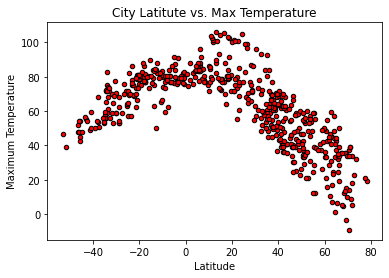

In [54]:
all_df.plot(kind = "scatter", x = "Lat", y = "Max Temp", marker="o", c="red", edgecolors="black")
plt.title("City Latitute vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")
plt.savefig("../output_data/city_lat_maxtemp.png")
plt.show()

In [ ]:
# PLOT THEN ADD A FEW SENTENCES "EXPLAINING WHAT THE CODE IS ANALYZING"

# Latitude vs. Humidity Plot

In [ ]:
# PLOT THEN ADD A FEW SENTENCES "EXPLAINING WHAT THE CODE IS ANALYZING"

# Latitude vs. Cloudiness Plot

In [ ]:
# PLOT THEN ADD A FEW SENTENCES "EXPLAINING WHAT THE CODE IS ANALYZING"

# Latitude vs. Wind Speed Plot

In [ ]:
# PLOT THEN ADD A FEW SENTENCES "EXPLAINING WHAT THE CODE IS ANALYZING"

# Linear Regression

# Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
# The r-value is: 0.46937863826630627

In [ ]:
#PUT PLOT HERE AND ADD A FEW SENTENCES TO DESCRIBE RELATIONSHIPS OR OTHER OBSERVATIONS

# Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
# The r-value is: 0.6082708688906918

In [ ]:
#PUT PLOT HERE AND ADD A FEW SENTENCES TO DESCRIBE RELATIONSHIPS OR OTHER OBSERVATIONS

# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
#The r-value is: 0.000543987878808455

In [ ]:
#PUT PLOT HERE AND ADD A FEW SENTENCES TO DESCRIBE RELATIONSHIPS OR OTHER OBSERVATIONS

# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
# The r-value is: 0.014985174297345524

In [ ]:
#PUT PLOT HERE AND ADD A FEW SENTENCES TO DESCRIBE RELATIONSHIPS OR OTHER OBSERVATIONS

# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
# The r-value is: 0.0020898727664228514

In [ ]:
#PUT PLOT HERE AND ADD A FEW SENTENCES TO DESCRIBE RELATIONSHIPS OR OTHER OBSERVATIONS

# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
# The r-value is: 0.0035263772085582894

In [ ]:
#PUT PLOT HERE AND ADD A FEW SENTENCES TO DESCRIBE RELATIONSHIPS OR OTHER OBSERVATIONS

# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
# The r-value is: 0.04019723576144484

In [ ]:
#PUT PLOT HERE AND ADD A FEW SENTENCES TO DESCRIBE RELATIONSHIPS OR OTHER OBSERVATIONS

# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
#  The r-value is: 0.017128274759839232

In [ ]:
#PUT PLOT HERE AND ADD A FEW SENTENCES TO DESCRIBE RELATIONSHIPS OR OTHER OBSERVATIONS